<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Real_Time_Bidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Real Time Bidding 

#### Decision Tree Classification  

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("biddings.csv")
df = pd.DataFrame(data)
df.shape

(1000000, 89)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


In [ ]:
# showing column wise %ge of NaN values they contains 
null_col = []

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)
  if df[i].isna().mean()*100 > 0:
    null_col.append(i)


0 	-	 0.0
1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0
74 	-	 0.0
75 	-	 0.0
76 	-	 0.0
77 	-	 0.0
78 	-	 0.0
79 	-	 0.0
80 	-	 0.0
81 	-	 0.0
82 	-	 0.0
83 	-	 0.0
84 	-	 0.0
85 	-	 0.0
86 	-	 0.0
87 	-	 0.0
convert 	-	 0.0


> Since data does'nt contain any null values, we can move further

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 89 columns):
0          1000000 non-null float64
1          1000000 non-null float64
2          1000000 non-null float64
3          1000000 non-null float64
4          1000000 non-null float64
5          1000000 non-null float64
6          1000000 non-null float64
7          1000000 non-null float64
8          1000000 non-null float64
9          1000000 non-null float64
10         1000000 non-null float64
11         1000000 non-null float64
12         1000000 non-null float64
13         1000000 non-null float64
14         1000000 non-null float64
15         1000000 non-null float64
16         1000000 non-null float64
17         1000000 non-null float64
18         1000000 non-null float64
19         1000000 non-null float64
20         1000000 non-null float64
21         1000000 non-null float64
22         1000000 non-null float64
23         1000000 non-null float64
24         1000000 non-n

> Here all the features are numerical and contains decimal values. Only last featur has integer values so it's appeared it's our target class with value either 0 or 1.

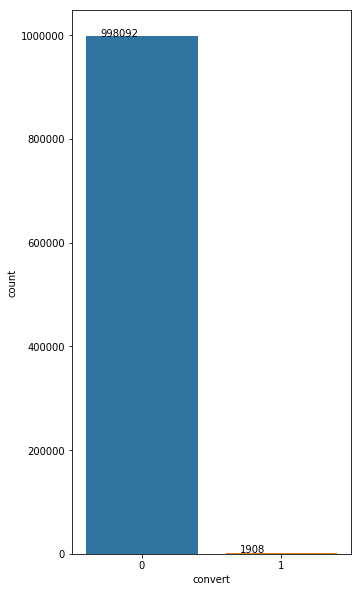

In [ ]:
plt.figure(figsize=(5,10))
ax = sns.countplot(x='convert', data=df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here this bar graph easily shows how data is imbalanced. Less than 1% data is in class __1__. So, first, we have to balance th data in to get more precise predictions.
>
> For Balancing the data I'm using undersampling in which we will reduce the rows of class __0__ to the number equal to that of class __1__ (ratio 1:1).


In [ ]:
class_1 = df[df['convert'] == 1]
class_0 = df[df['convert'] == 0].sample(n = len(class_1))

In [ ]:
new_df = pd.concat([class_1, class_0]).sample(frac=1)

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
723304,-0.00,-2.43,-2.29,-0.81,0.98,0.49,0.32,0.90,-0.60,0.83,...,-0.04,0.07,0.06,-0.64,0.91,-1.53,-0.02,0.89,-0.28,1
255661,0.04,-7.33,-2.98,-0.80,0.77,0.36,-1.32,1.40,-0.61,2.02,...,0.02,-0.52,-0.20,-0.53,-0.61,-0.54,-0.09,0.40,-0.12,1
28425,-0.01,1.82,2.50,-0.54,0.79,0.28,0.02,-0.68,0.06,-1.45,...,-0.41,-0.56,1.33,-2.71,-0.06,1.55,-0.20,-0.21,0.08,0
72259,-0.01,-1.48,1.39,-0.01,0.79,0.21,0.02,0.83,-0.34,0.88,...,0.47,0.11,-0.04,-1.06,-0.45,-0.84,-0.76,-0.99,0.30,1
365941,-0.02,1.95,2.87,-0.26,-0.10,0.10,0.09,-0.67,0.54,-0.92,...,0.05,0.05,-0.76,-0.65,-0.15,1.68,-3.72,0.11,-0.00,0


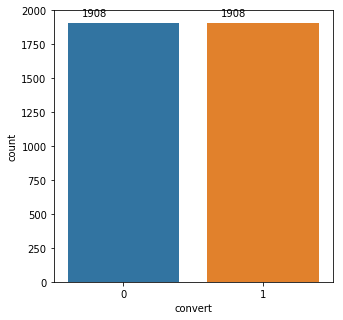

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='convert', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


> Here we ca see that no both the classes are balanced.

In [ ]:
X = new_df.drop(['convert'], axis=1)
y = new_df['convert']

> Since we have a very huge dataset with a large no of features, so in order to precise th results there is need of dimentionality reduction. For that we are using here PCA.

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10) 
X = pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.023919,0.213377,1.526578,-0.752428,-0.428215,-1.228545,-1.037803,0.949632,0.400397,-0.096623
1,-6.964788,0.681679,1.582923,-0.974278,-0.571941,-1.586572,-2.795678,0.488087,-0.449341,1.333902
2,2.891359,-0.416669,-2.486776,-0.825003,0.455305,-0.005922,2.148930,0.580026,0.704117,-0.602004
3,-0.434614,-0.042212,-1.868093,-0.427181,0.012641,-0.858465,-1.663698,-0.028006,0.198378,-0.343703
4,3.045903,-0.442342,-2.698484,-0.514353,0.251681,0.505057,1.258160,-0.464391,0.232628,0.032238


In [ ]:
pca.explained_variance_ratio_ 

array([0.09753439, 0.08677011, 0.05376632, 0.04486538, 0.03994616,
       0.02530382, 0.02462134, 0.0222823 , 0.02174146, 0.02043742])

In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

> In order to get better results lets tune the some specific Hyperparameters using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split 
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Criterion used while gormin tree
criterion = ['gini', 'entropy']
# The strategy used to choose the split at each node
splitter = ['best', 'random']

# Create the random grid
grid = {'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'splitter': splitter}

In [ ]:
clf = GridSearchCV( estimator = DecisionTreeClassifier(),  param_grid = grid, cv = 5)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()


,Actual,Predicted
634653,0,1
284728,0,0
688045,0,0
191641,0,1
655347,0,0


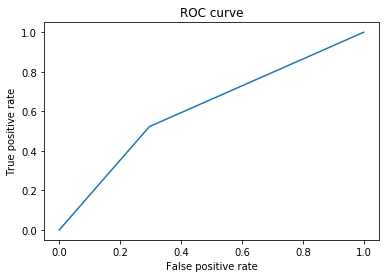

AUC of the predictions: 0.6133053839364518
Accuracy score of the predictions: 0.6204188481675392


In [ ]:

from sklearn import metrics

# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

# Measure the Accuracy Score
print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_pred, y_test)))


> Here we got AUC score 0.61 we is not an excellent score but still acceptable.
> So we can say that our model is 62% acuurate ( Accuracy score = 0.62 ).